<a href="https://colab.research.google.com/github/Highashikata/Data-Science---Customer-Segmentation-Using-K-Means/blob/main/Data_Science_Customer_Segmentation_Using_K_means_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation**
<p>In this Jupyter Notebook we will be carring on what  we've done during the Customer Segmentation Project Using K-Means Clustering. But this time we will procede through Dimension Reduction using the PCA Algorithm. </p>

<p>After that we will be deploying our results into a Power BI report for business uses.</p>

#### **Part 1 : Importing useful Libraries**


In [26]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [4]:
# Load the Data into Google Colab
from google.colab import files
uploaded= files.upload()

Saving Customers_Raw_Data.xlsx to Customers_Raw_Data.xlsx


##### **Importing the Data into pandas**

In [5]:
# Reading the Data With Pandas
Raw_Data = pd.read_excel("Customers_Raw_Data.xlsx")

# Viewing the First 5 rows of the DataSet & Its Shape
display("The Shape of The DataSet is {}".format(Raw_Data.shape), Raw_Data.head(10))

'The Shape of The DataSet is (11852, 19)'

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
5,6,65 or older,Male,AL7 9AJ,Welwyn Hatfield,Welwyn Hatfield,51.804196,-0.205381,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,4 hours,Mostly disagree,Neither agree nor disagree,Wooden Bar,Mostly agree,Somewhat Unlikely,Somewhat agree
6,7,50-59,Female,BL1 4NW,Bolton,Bolton West,53.581008,-2.455316,Living with partner,"50,000 to 74,999",4 Times a Year,Up to 1 hour,4 hours,Mostly disagree,Mostly agree,Ice Bar,Mostly agree,Mostly Unlikely,Somewhat agree
7,8,33-39,Male,DA1 9GL,Dartford,Dartford,51.444500,0.209755,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
8,9,33-39,Female,BL9 9GP,Bury,Bury North,53.580693,-2.283884,Divorced,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
9,10,33-39,Male,HP22 5ZF,Aylesbury Vale,Aylesbury,51.803390,-0.724381,Married with children,"50,000 to 74,999",3 Times a Year,Up to 1 hour,6 hours plus,Somewhat disagree,Mostly agree,Ice Bar,Neither agree nor disagree,Mostly Unlikely,Somewhat disagree


##### **Exploring the Data**

In [11]:
# We will copy the data to save the raw one 
df = Raw_Data.copy()

In [18]:
# The Data Types
display("Showing the DataFrame Data Types", df.dtypes)

'Showing the DataFrame Data Types'

CUSTOMER                                                            int64
Age                                                                object
Gender                                                             object
Postcode                                                           object
District                                                           object
Constituency                                                       object
latitude                                                          float64
longitude                                                         float64
Current_Status                                                     object
Total_Household_Income                                             object
How often you attend Entertaining events in a year?                object
Social_Media                                                       object
How many hours are you willing to travel to attend an event?       object
Do you enjoy adrenaline-rush activitie

In [19]:
# Describe the Data
df.describe()

,CUSTOMER,latitude,longitude
count,11852.000000,11852.000000,11852.000000
mean,6533.609349,52.688012,-1.985162
std,3770.698812,3.955425,1.800613
min,1.000000,0.000000,-8.140132
25%,3265.750000,51.503408,-2.981688
50%,6551.500000,52.401214,-1.931265
75%,9818.250000,54.057439,-0.409754
max,13042.000000,58.241169,12.496366


In [20]:
### Checking for missing data
df.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [43]:
#### Viz the Rows with the missing Data of the Social Media Feature
df[df['Social_Media'].isnull()]

#### Viz the Rows with the missing Data of the Social Media Feature
df[df["Do you enjoy adrenaline-rush activities?"].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
### Dropping the Rows with the Missing values
df = df.dropna(subset = ['Do you enjoy adrenaline-rush activities?'])


### Printing the Shape of the DataSet
print(Raw_Data.shape[0] - df.shape[0])


### Rechecking for the sum of missing Values
df.isna().sum()

5


CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

**Comment : ** It seems that we still have a misisng value within a the "Did you find our events value for money?" Feature

In [50]:
### Printing the Row with the missing value in the "Did you find our events value for money?" feature
df[df['Did you find our events value for money?'].isnull()]

### we will removing this row
df.drop(df[df['Did you find our events value for money?'].isnull()].index, inplace = True)

### Rechecking for the any remaining missing value
df.isna().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

#### **Comment : So after the verification there's no more missing values, now we can go ahead and continue analysing the Data.**

#### **Dropping Duplicate Rows**

In [51]:
### Checking for the DataSet shape before removing the Data
print("The Shape of the Data Before removing duplicate rows is {}".format(df.shape))

### The Code to remove the duplicate rows
duplicate_rows_df = df[df.duplicated()]

### Displaying the Duplicate rows DataFrame
display("The Shape of the Duplicate Rows DataFrame is {}".format(duplicate_rows_df.shape))

The Shape of the Data Before removing duplicate rows is (11846, 19)


'The Shape of the Duplicate Rows DataFrame is (0, 19)'

##### **Data Pre-processing**

In [52]:
### Data Pre-processing
## Determining the Unique Values in the Dataset

for column in df:
  if len(df[column].unique()) < 7:
    print('The Number of Values for the Feature {} : {} ------- {}'.format(column, df[column].unique(), len(df[column].unique())))
  else:
    print('The Number of values for the Feature {} : {}'.format(column, len(df[column].unique())))

The Number of values for the Feature CUSTOMER : 11846
The Number of values for the Feature Age : 9
The Number of Values for the Feature Gender : ['Female' 'Male'] ------- 2
The Number of values for the Feature Postcode : 11784
The Number of values for the Feature District : 221
The Number of values for the Feature Constituency : 355
The Number of values for the Feature latitude : 10730
The Number of values for the Feature longitude : 10751
The Number of values for the Feature Current_Status : 8
The Number of values for the Feature Total_Household_Income : 8
The Number of Values for the Feature How often you attend Entertaining events in a year? : ['4 Times a Year' '3 Times a Year' '1 Times a Year' '2 Times a Year'
 '5+ Times a Year'] ------- 5
The Number of Values for the Feature Social_Media : ['Up to 1 hour' "I don't spend any time at all" 'Half a day'
 'Up to 2 hours' 'More than half a day'] ------- 5
The Number of values for the Feature How many hours are you willing to travel to a

##### **Data Vizualisation**

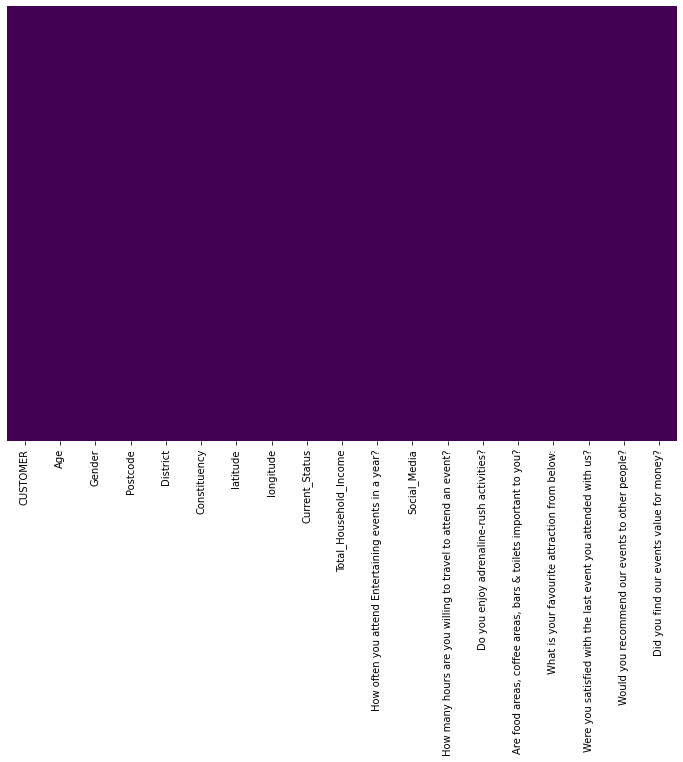

In [53]:
#### Checking for missing values visually
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = 'viridis', ax = ax)

##### **Categorical Variables Analysis:** 
Categorical variable analysis — Now we will understand how data is distributed in categorical feature.

In [54]:
#### Defining a New DataSet with only the categorical variables

categorical_df = df.select_dtypes("object")
display(categorical_df.info(), categorical_df.head(), print('-'*20, categorical_df.columns))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11846 entries, 0 to 11850
Data columns (total 16 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Age                                                             11846 non-null  object
 1   Gender                                                          11846 non-null  object
 2   Postcode                                                        11846 non-null  object
 3   District                                                        11846 non-null  object
 4   Constituency                                                    11846 non-null  object
 5   Current_Status                                                  11846 non-null  object
 6   Total_Household_Income                                          11846 non-null  object
 7   How often you attend Entertaining events in a year?       

None

,Age,Gender,Postcode,District,Constituency,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


None

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/pyt

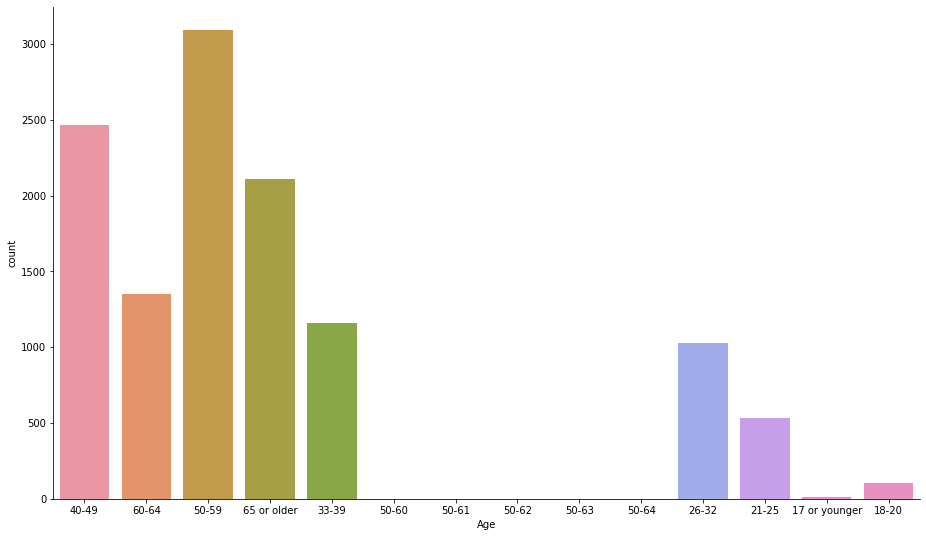

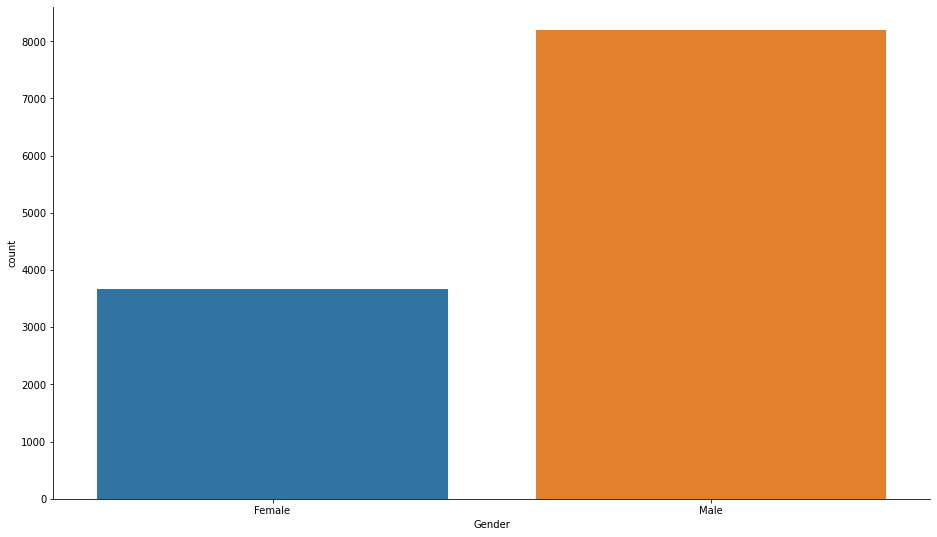

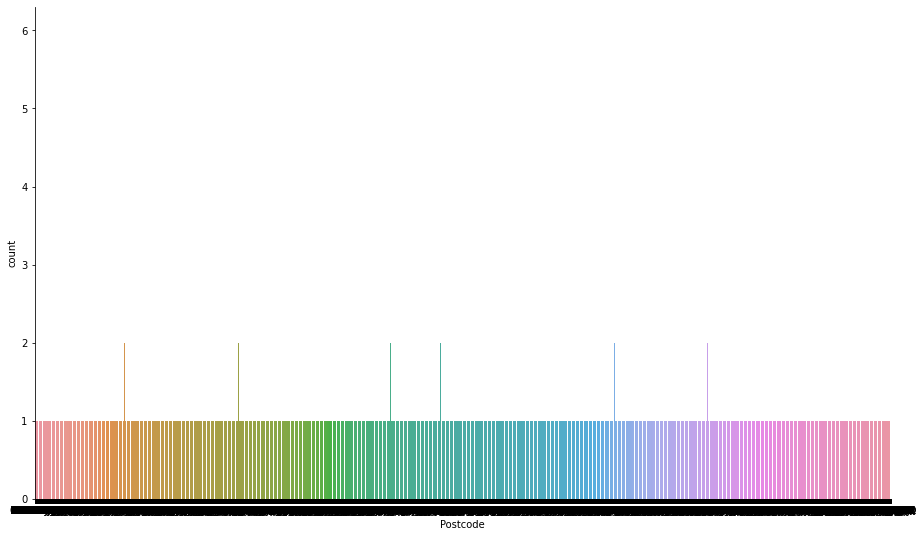

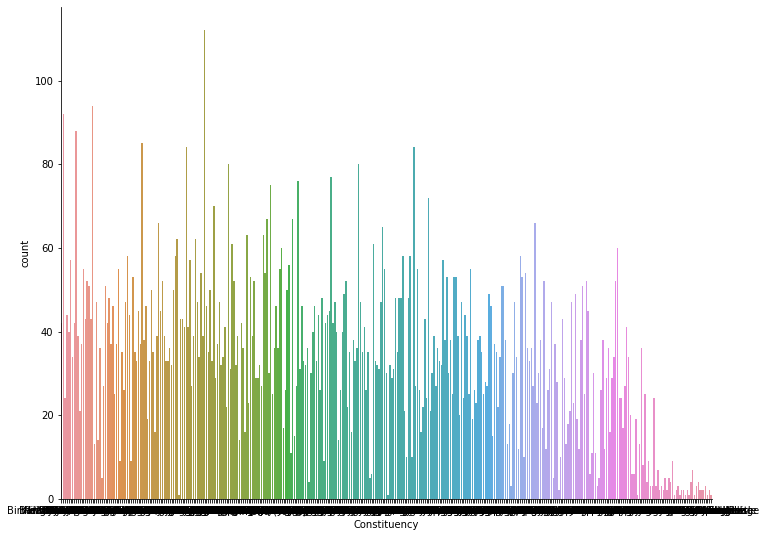

In [38]:
## Checking for The Gender Count
import seaborn as sns
from matplotlib import rcParams
fields = ['Age', 'Gender', 'Postcode', 'Constituency']

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

for field in fields:
  sns.factorplot(field, data = categorical_df, kind = 'count')
  plt.gcf().set_size_inches(15, 8)

In [55]:
## Columns to drop from the dataset
location_columns = ['CUSTOMER', 'Postcode', 'District', 'latitude', 'longitude']

data_to_convert = df.copy()
# for location in location_columns:
#   data_to_convert = df.drop(location, axis = 1, inplace = True)

dummy_data = pd.get_dummies(data_to_convert)

# # Checking for the dummy data
# i = 0
# for column in dummy_data:
#   if (dummy_data[column].unique() == [0, 1]).any():
#     print("Go Ahead and Create Your Machine Learning Model")
#   else:
#     print("Try Again Reconverting your Data it seems that there's an issue")
  

for column in dummy_data:
  print("The Values of the Column {} are {}".format(column, dummy_data[column].unique()))


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
The Values of the Column Postcode_DE6 2BJ are [0 1]
The Values of the Column Postcode_DE6 2BX are [0 1]
The Values of the Column Postcode_DE6 3BW are [0 1]
The Values of the Column Postcode_DE6 3FR are [0 1]
The Values of the Column Postcode_DE6 3GS are [0 1]
The Values of the Column Postcode_DE6 3LH are [0 1]
The Values of the Column Postcode_DE6 4AE are [0 1]
The Values of the Column Postcode_DE6 4GQ are [0 1]
The Values of the Column Postcode_DE6 4GT are [0 1]
The Values of the Column Postcode_DE6 4LN are [0 1]
The Values of the Column Postcode_DE6 4NG are [0 1]
The Values of the Column Postcode_DE6 4PH are [0 1]
The Values of the Column Postcode_DE6 5DE are [0 1]
The Values of the Column Postcode_DE6 5DR are [0 1]
The Values of the Column Postcode_DE6 5GT are [0 1]
The Values of the Column Postcode_DE6 6BP are [0 1]
The Values of the Column Postcode_DE65 5AD are [0 1]
The Values of the Column Postcode_DE6

##### **Creating the Machine Learning Model**

In [63]:
### Importing Machine Learning Libraries
from sklearn.cluster import KMeans, k_means

### Creating the Training Set
X_train = dummy_data.values

### We will start with 4 clusters
kmeans = KMeans(n_clusters = 4, random_state = 450)
kmeans = kmeans.fit(X_train)

### Printing the model
print(kmeans)

KMeans(n_clusters=4, random_state=450)


In [56]:
dummy_data.head()

,CUSTOMER,latitude,longitude,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,Gender_Male,Postcode_AB1 0EH,Postcode_AB1 0SA,Postcode_AB1 1LT,Postcode_AB1 1XP,Postcode_AB1 2EH,Postcode_AB1 2UR,Postcode_AB1 3BJ,Postcode_AB1 3NH,Postcode_AB1 3RP,Postcode_AB1 3YE,Postcode_AB1 4AY,Postcode_AB1 4BB,Postcode_AB1 5HQ,Postcode_AB1 5JB,Postcode_AB1 5LE,Postcode_AB1 5RW,Postcode_AB1 6DW,Postcode_AB1 6PF,Postcode_AB1 6SZ,Postcode_AB1 6UY,Postcode_AB1 6WB,Postcode_AB1 6YU,Postcode_AB1 7AP,Postcode_AB1 7EY,Postcode_AB1 7JX,Postcode_AB1 7LQ,...,Do you enjoy adrenaline-rush activities?_Mostly agree,Do you enjoy adrenaline-rush activities?_Mostly disagree,Do you enjoy adrenaline-rush activities?_Neither agree nor disagree,Do you enjoy adrenaline-rush activities?_Somewhat agree,Do you enjoy adrenaline-rush activities?_Somewhat disagree,"Are food areas, coffee areas, bars & toilets important to you?_Entirely agree","Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree","Are food areas, coffee areas, bars & toilets important to you?_Mostly agree","Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree","Are food areas, coffee areas, bars & toilets important to you?_Neither agree nor disagree","Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree","Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree",What is your favourite attraction from below:_Crazy rollercoaster ride,What is your favourite attraction from below:_Happy Rollercoaster,What is your favourite attraction from below:_Ice Bar,What is your favourite attraction from below:_Ice skating,What is your favourite attraction from below:_Kids Playground,What is your favourite attraction from below:_Tree climbing,What is your favourite attraction from below:_Wooden Bar,Were you satisfied with the last event you attended with us?_Entirely agree,Were you satisfied with the last event you attended with us?_Entirely disagree,Were you satisfied with the last event you attended with us?_Mostly agree,Were you satisfied with the last event you attended with us?_Mostly disagree,Were you satisfied with the last event you attended with us?_Neither agree nor disagree,Were you satisfied with the last event you attended with us?_Somewhat agree,Were you satisfied with the last event you attended with us?_Somewhat disagree,Would you recommend our events to other people?_Mostly Likely,Would you recommend our events to other people?_Mostly Unlikely,Would you recommend our events to other people?_Neither agree nor disagree,Would you recommend our events to other people?_Somewhat Likely,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,1,51.727429,-0.183648,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,51.804482,-0.195898,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,3,57.692200,-2.022295,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,4,52.526595,-1.822211,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0

In [61]:
# dummy_data.drop(columns = ['CUSTOMER', 'latitude', 'longitude'], inplace = True)
dummy_data.head()

,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,Gender_Male,Postcode_AB1 0EH,Postcode_AB1 0SA,Postcode_AB1 1LT,Postcode_AB1 1XP,Postcode_AB1 2EH,Postcode_AB1 2UR,Postcode_AB1 3BJ,Postcode_AB1 3NH,Postcode_AB1 3RP,Postcode_AB1 3YE,Postcode_AB1 4AY,Postcode_AB1 4BB,Postcode_AB1 5HQ,Postcode_AB1 5JB,Postcode_AB1 5LE,Postcode_AB1 5RW,Postcode_AB1 6DW,Postcode_AB1 6PF,Postcode_AB1 6SZ,Postcode_AB1 6UY,Postcode_AB1 6WB,Postcode_AB1 6YU,Postcode_AB1 7AP,Postcode_AB1 7EY,Postcode_AB1 7JX,Postcode_AB1 7LQ,Postcode_AB1 7QU,Postcode_AB1 7XP,Postcode_AB1 8DL,...,Do you enjoy adrenaline-rush activities?_Mostly agree,Do you enjoy adrenaline-rush activities?_Mostly disagree,Do you enjoy adrenaline-rush activities?_Neither agree nor disagree,Do you enjoy adrenaline-rush activities?_Somewhat agree,Do you enjoy adrenaline-rush activities?_Somewhat disagree,"Are food areas, coffee areas, bars & toilets important to you?_Entirely agree","Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree","Are food areas, coffee areas, bars & toilets important to you?_Mostly agree","Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree","Are food areas, coffee areas, bars & toilets important to you?_Neither agree nor disagree","Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree","Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree",What is your favourite attraction from below:_Crazy rollercoaster ride,What is your favourite attraction from below:_Happy Rollercoaster,What is your favourite attraction from below:_Ice Bar,What is your favourite attraction from below:_Ice skating,What is your favourite attraction from below:_Kids Playground,What is your favourite attraction from below:_Tree climbing,What is your favourite attraction from below:_Wooden Bar,Were you satisfied with the last event you attended with us?_Entirely agree,Were you satisfied with the last event you attended with us?_Entirely disagree,Were you satisfied with the last event you attended with us?_Mostly agree,Were you satisfied with the last event you attended with us?_Mostly disagree,Were you satisfied with the last event you attended with us?_Neither agree nor disagree,Were you satisfied with the last event you attended with us?_Somewhat agree,Were you satisfied with the last event you attended with us?_Somewhat disagree,Would you recommend our events to other people?_Mostly Likely,Would you recommend our events to other people?_Mostly Unlikely,Would you recommend our events to other people?_Neither agree nor disagree,Would you recommend our events to other people?_Somewhat Likely,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [64]:
# Printing the Clusters assigned to each observation
print("The Clusters are : {}".format(kmeans.labels_), kmeans.labels_.shape)

# Printing the Inertia
print("The Inertia is : ", kmeans.inertia_)

The Clusters are : [0 0 0 ... 0 1 0] (11846,)
The Inertia is :  117617.04482050543


In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state = 1),
                  X_train, 
                  k = (2, 10),
                  timings = False)

In [65]:
### Finding the Best Number of Clusters

### We begin by running K Means with multiple Ks

num_of_clusters = range(2, 10)
inertia = []

for k in num_of_clusters:
  kmeans = KMeans(n_clusters = k, random_state = 450)
  kmeans = kmeans.fit(X_train)
  k_inert = kmeans.inertia_
  inertia.append(k_inert)
  print("The Inertia for {} Clusters is {}".format(k, k_inert))

The Inertia for 2 Clusters is 132903.72352818146
The Inertia for 3 Clusters is 124894.7106553441
The Inertia for 4 Clusters is 117617.04482050543
The Inertia for 5 Clusters is 114007.28838419219
The Inertia for 6 Clusters is 110780.50406209435
The Inertia for 7 Clusters is 109108.00495418106
The Inertia for 8 Clusters is 107040.16907129543
The Inertia for 9 Clusters is 105547.18577803351


In [67]:
# Running K means on 4 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 1", "Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,979,2397,1690,6780
